In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import nltk
%matplotlib inline

In [14]:
poll_data = pd.read_csv('../data/mlcourse_open_first_survey_parsed.csv', index_col='id')

In [15]:
poll_data.head(2)

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [16]:
poll_data.shape

(2944, 14)

In [17]:
rename_dict = dict(zip(poll_data.columns, [
    'time',
    'intro',
    'jupyter',
    'expect',
    'sport',
    'personal',
    'math_level',
    'quest1',
    'quest2',
    'quest3',
    'fib_gen',
    'python',
    'github',
    'movie',
]))

In [18]:
poll_data.rename(columns=rename_dict, inplace=True)

In [19]:
poll_data.head()

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [20]:
poll_data['jupyter'].value_counts()

Да                                                                                                                           2071
Нет                                                                                                                           766
немного                                                                                                                         7
Немного                                                                                                                         3
Немного,  недавно начал проходить курс от яндекса на курсоре                                                                    2
Spyder IDE                                                                                                                      2
Да, но мало                                                                                                                     2
Да, но мало. В основном со Spyder                                                         

In [21]:
poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).head()

id
0    1.0
1    1.0
2    1.0
3    1.0
5    1.0
Name: jupyter, dtype: float64

In [24]:
poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2).value_counts()

1.0    2071
0.0     766
2.0     107
Name: jupyter, dtype: int64

In [25]:
jupyter_level = poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2)

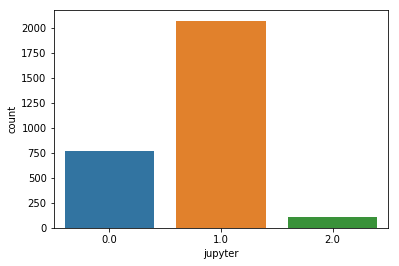

In [26]:
sns.countplot(jupyter_level)

In [27]:
poll_data.sport.value_counts()

Футбол                                                                                     197
футбол                                                                                     113
Баскетбол                                                                                  113
Плавание                                                                                    94
Хоккей                                                                                      66
Волейбол                                                                                    62
Бег                                                                                         51
Бокс                                                                                        38
баскетбол                                                                                   38
Шахматы                                                                                     36
Теннис                                            

In [28]:
poll_data['quest1'].head()

id
0      3
1      3
2      3
3    0.5
5      3
Name: quest1, dtype: object

In [30]:
poll_data['quest1'].unique()

array(['3', '0.5', '0.03', nan, '0', '2', '13', '1/7',
       'ВЫ ЧООООООООООООООООООООООООООООООООООООООООООООООООООООО', '4',
       '1', 'моя не знать как решить', 'не хватает данных?:(',
       'Хех, не помню', '42', '0,6', '4.666667', '0,3',
       'Не знаю, надо гуглить', 'не знаю', '6',
       'Восстанавливаю навыки математики', 'затрудняюсь ответить', '1/6',
       '0,36', 'na', 'Нужно 2 дня, чтобы в этом разобраться!', '2,25',
       'нужно гуглить', 'Я не знаю,  1/6 ?', '=(', '?', '12,25',
       'Не знаю', '4.66', '1.6', "don't know", 'что такое дисперсия?',
       '4  нагуглил', '0,0396', 'хз',
       'я курс от мфти и яндекса проходил да еще не до конца прошел, но знаю, что квадратный корень дисперсии(то есть сигма) эт среднеквадратичное отклонение, а оно вроде как равно 3',
       '4.6',
       'Если это ГС - то 4.0, если это выборка - то приблизительно 4.6',
       'не помню', 'недостаточно данных',
       'понятия не имею, лучше, чем 0.6 / 1 не отвечу.',
       'надо гу

In [31]:
poll_data['quest3'].unique()

array([ 2., nan,  1.,  4.,  3.])

In [36]:
(poll_data['quest3'] == 2).dropna().sum() / poll_data.dropna().shape[0]

1.3630952380952381

In [37]:
poll_data['quest3'].isnull()

id
0       False
1       False
2       False
3       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16      False
17      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
        ...  
3180    False
3182    False
3183    False
3184    False
3186    False
3187    False
3188    False
3189    False
3190     True
3191     True
3192    False
3194    False
3195    False
3196    False
3197     True
3198    False
3199    False
3200    False
3202    False
3203    False
3204     True
3205    False
3207    False
3208    False
3209    False
3210    False
3212    False
3213    False
3214    False
3215     True
Name: quest3, Length: 2944, dtype: bool

In [41]:
all = poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]

In [42]:
all

2725

In [43]:
(poll_data['quest3'] == 2).dropna().sum() / all

0.9244036697247706

In [44]:
poll_data['intro'].head()

id
0                                     крутой Developer
1    Разработчик Navision. Изучаю тему DS для возмо...
2    Я Software Engeneer разработчик, активно интер...
3    Семилетний инженер. Специализируюсь в компьюте...
5                           программист. pl/sql python
Name: intro, dtype: object

In [45]:
poll_data['intro'].tail()

id
3210              Занимаюсь анализом данных в страховании
3212                         Аналитик в телеком компании.
3213    Занимаюсь сопровождением автоматизированных си...
3214                               разработчик Python, JS
3215    Работал аналитиком в разных сферах, включая e-...
Name: intro, dtype: object

In [52]:
words = poll_data['intro'].apply(lambda s : s.strip().split()).values

In [53]:
np.concatenate(words)

array(['крутой', 'Developer', 'Разработчик', ..., 'онлайн-банкинг.',
       'Увлекаюсь', 'программированием'], dtype='<U81')

In [57]:
all_words = np.concatenate(words)

In [58]:
len(all_words)

26533

In [69]:
words_series = pd.Series(list(all_words))

In [62]:
from nltk.corpus import stopwords

In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rasmadeus/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [66]:
rw = stopwords.words('russian')

In [67]:
rw

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [72]:
words_series[~words_series.isin(rw)].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
хочу        122
dtype: int64